In [2]:
import cv2
import numpy as np
from PIL import Image

import os
import matplotlib.pyplot as plt

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

## 5 - Implement homography from scratch

In [12]:
working_dir = '../task4/data/'
files = next(os.walk(working_dir))[2]

In [13]:
images = []
for file in files:
    #img = Image.open(os.path.join(working_dir, file))
    
    img = cv2.imread(os.path.join(working_dir, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    images.append(img)

In [14]:
def visualize(images):
    for img in images:
        plt.figure(figsize=(15, 15))
        plt.imshow(img, cmap='gray')
        plt.axis('off')

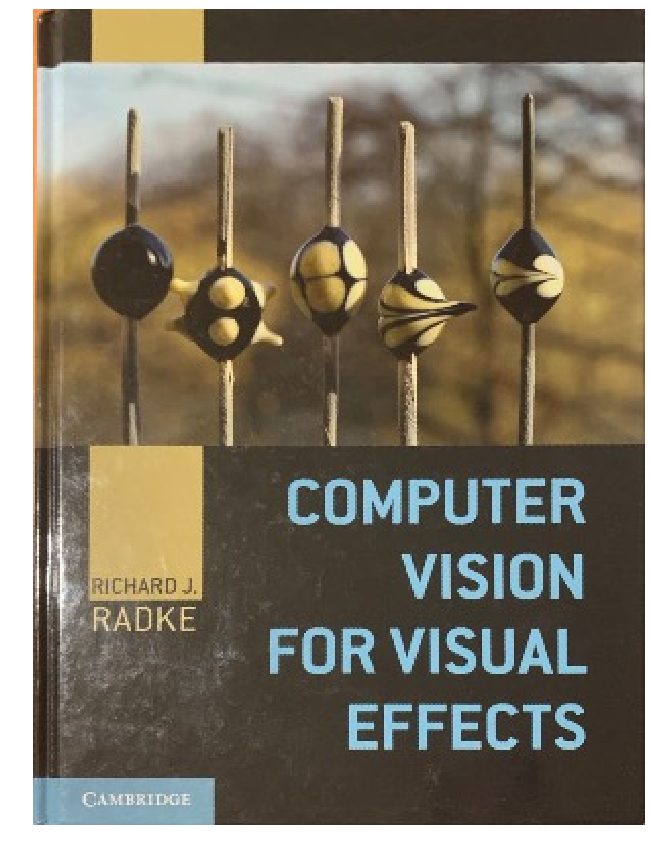

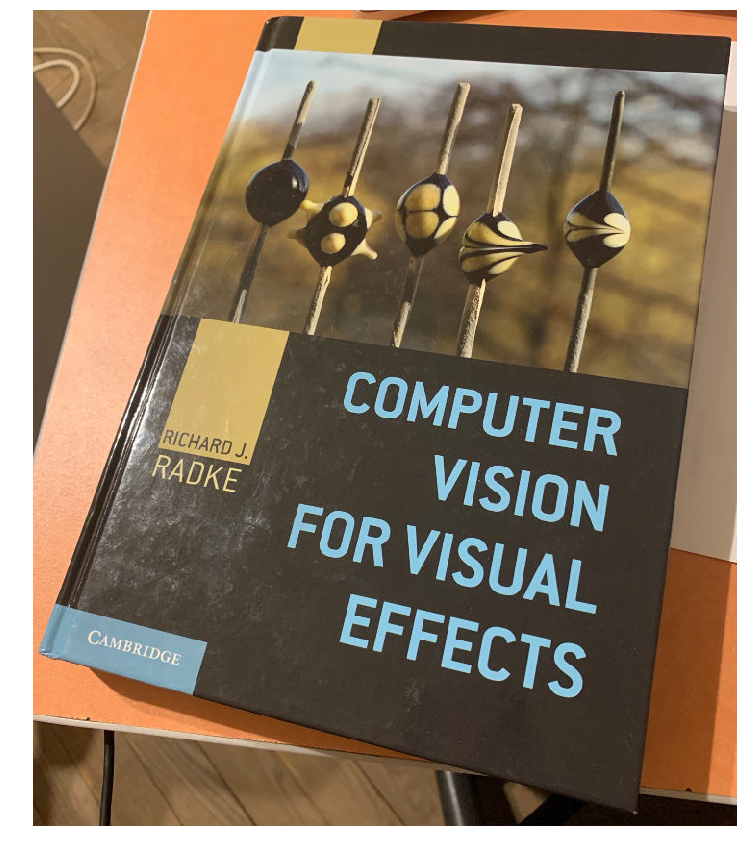

In [15]:
visualize(images)

In [16]:
dst = np.array([(0, 299), (0, 0), (399, 0), (399, 299)]).astype(np.float32)
src = np.array([(8, 665), (245, 11), (723, 28), (625, 833)]).astype(np.float32)

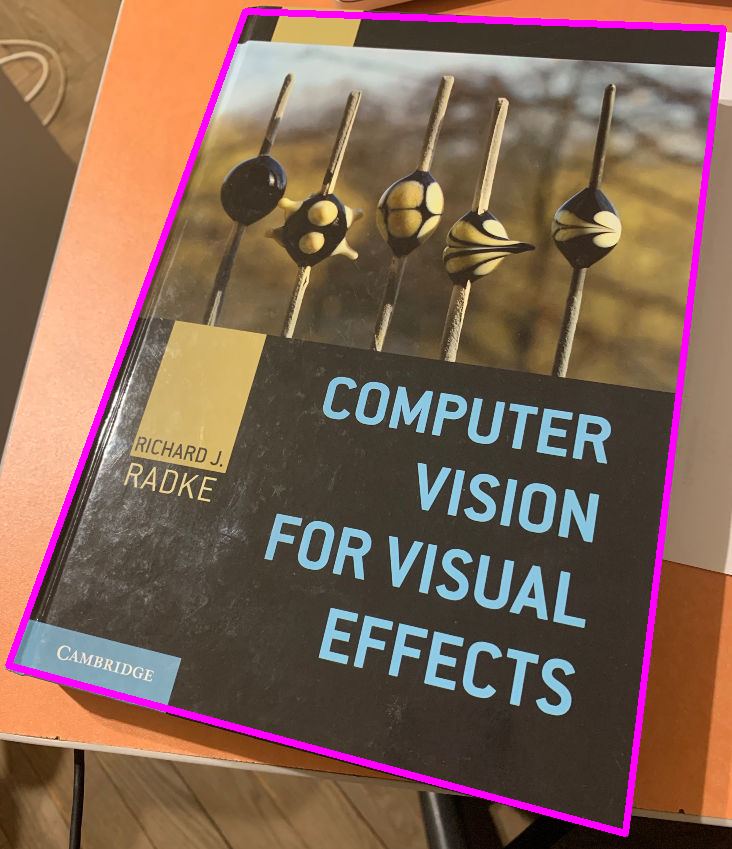

In [17]:
Image.fromarray(cv2.polylines(images[1], np.int32([src]), 1, (255, 0, 255), 5))

In [ ]:
perspective_matrix = cv2.getPerspectiveTransform(src, dst)

In [ ]:
output = cv2.warpPerspective(images[1], perspective_matrix, images[0].shape[:2])
Image.fromarray(output)

In [ ]:
def homography(src, dst):
    
    assert src.shape == dst.shape
    src = src.T
    dst = dst.T

    n_size = src.shape[1]
    a = np.zeros((2*n_size, 9))
    
    # creating equation Ax = 0
    for i in range(n_size):
        a[2 * i] = [-src[0][i], -src[1][i], -1, 0, 0, 0, dst[0][i] * src[0][i], dst[0][i] * src[1][i],
                    dst[0][i]]
        a[2 * i + 1] = [0, 0, 0, -src[0][i], -src[1][i], -1, dst[1][i] * src[0][i], dst[1][i] * src[1][i],
                        dst[1][i]]
        
    u, s, v = np.linalg.svd(a, full_matrices=True)
    homography_matrix = v[-1].reshape((3, 3))
    
    homography_matrix = homography_matrix / homography_matrix[2, 2]
    
    return homography_matrix

In [ ]:
perspective_matrix

In [ ]:
homography(src, dst)